In [1]:
%env SOCCERDATA_LOGLEVEL=ERROR
%env SOCCERDATA_NOCACHE=True
%env SOCCERDATA_NOSTORE=True

env: SOCCERDATA_LOGLEVEL=ERROR
env: SOCCERDATA_NOCACHE=True
env: SOCCERDATA_NOSTORE=True


In [2]:
import soccerdata as sd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

In [18]:
elo = sd.ClubElo()
current_elo = elo.read_by_date()
current_elo.reset_index(inplace=True)
current_elo = current_elo.loc[current_elo['country'] == 'ESP']
current_elo.to_csv('data/elo_spain.csv', index=False)

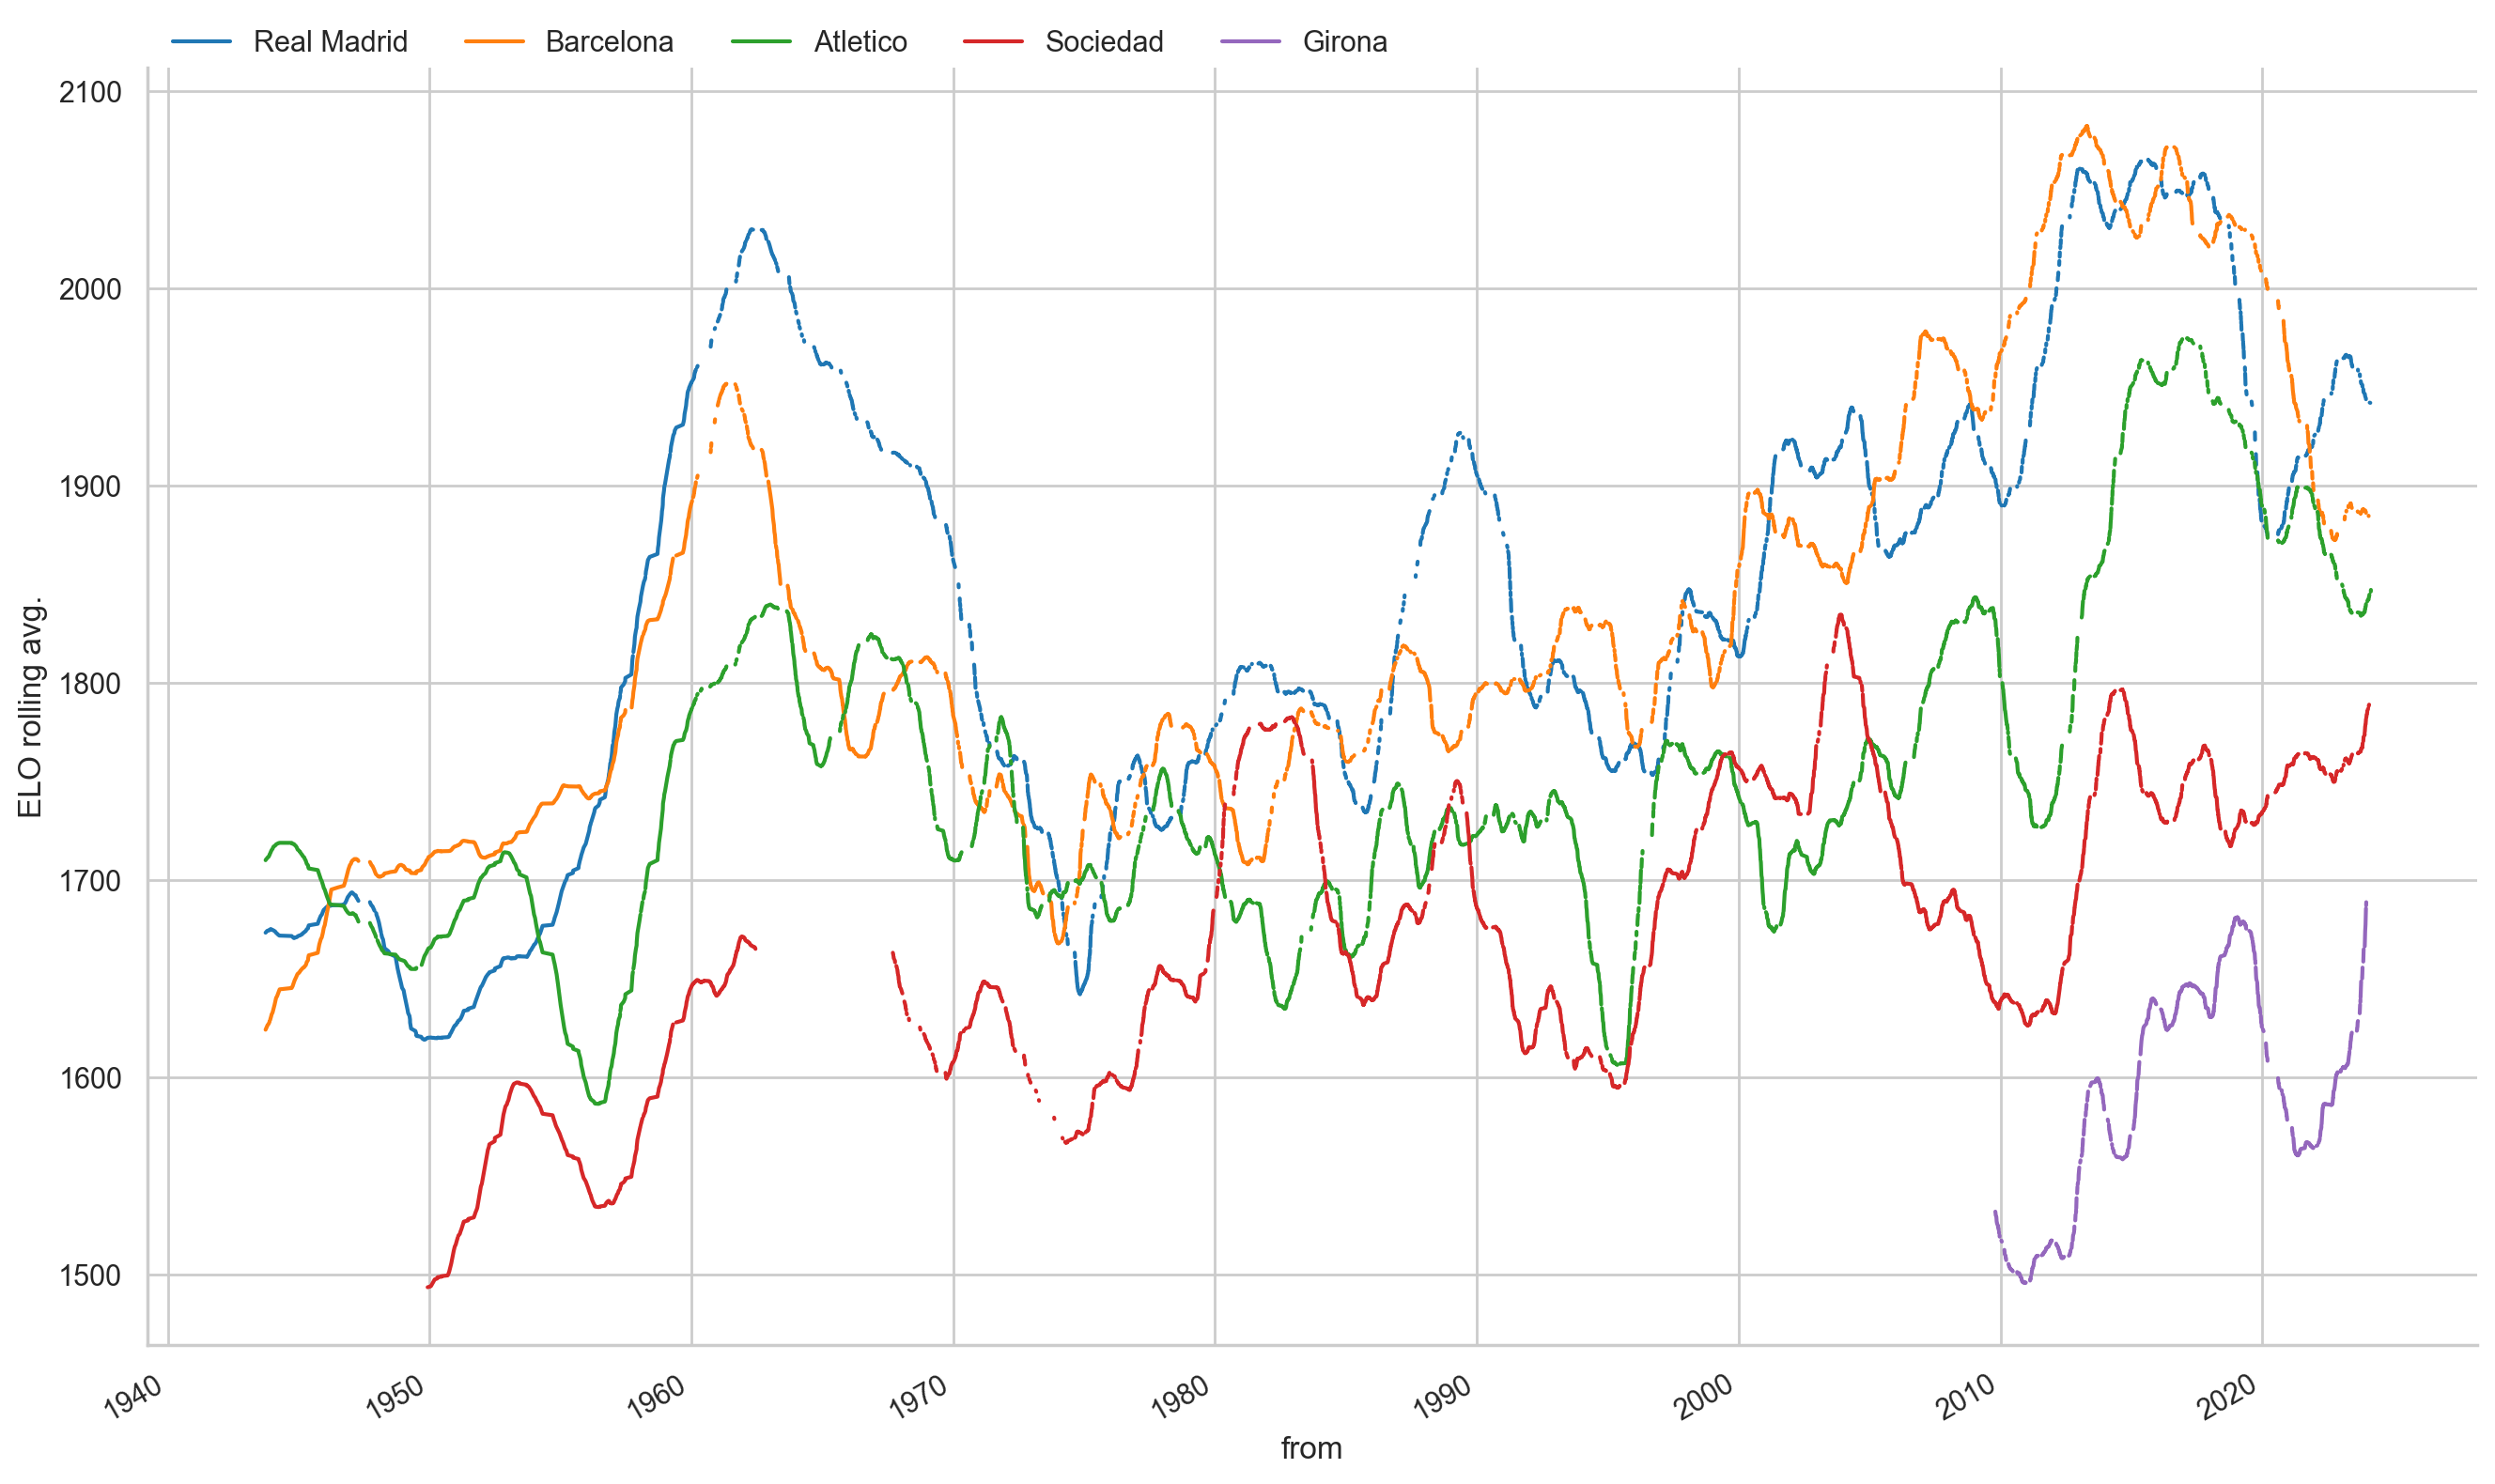

In [14]:
num_teams = 5
smoothing = 100
elo_top_development = pd.concat(
    [elo.read_team_history(team)['elo'].rolling(smoothing).mean()
     for team in current_elo.reset_index()['team'][:num_teams]
    ],
    axis=1)
elo_top_development.columns = current_elo.reset_index()['team'][:num_teams]
elo_top_development.fillna(method='ffill')

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(111, ylabel='ELO rolling avg.', xlabel='Date')
elo_top_development.plot(ax=ax1)
ax1.legend(loc='upper left', frameon=False, bbox_to_anchor=(0, 1.05), ncol=num_teams)
sns.despine()